<a href="https://colab.research.google.com/github/Dennis-LCLema/Sustainable-Tourism-Sring2025/blob/main/Bus_Electrification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Listed below are all the libraries you
# will need for this assignment. Run this
# code chunk everytime you open this file.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import io

In [107]:
# Fixed Parameters
#Simulation
num_simulations = 100  # Number of Simulations
num_years = 20    # Number of Years in each Simulation
minimum_daily_cruise_passengers = 5000
maximum_daily_cruise_passengers = 15000
minimum_daily_independent_tourist = 100
maximum_daily_independent_tourists = 1000
electric_bus_capacity = 80   # number of passengers an electric bus can carry comfortably.

#Bus parameters.
electric_bus_value = 825000           #average price of a new electric bus.
charging_equipment = 75000            #average cost of a new charging equipment that can charge 5 buses.
installation_cost = 30000             #average cost of installing a charging equipment.
cruise_passenger_transport = 0.375      #percentage of cruise passengers that use public transport.
independent_tourist_transport = 0.25    #percentage of independent passengers that use public transport.
buses_served_per_station = 5           #number of buses served by each charging station.

#Operating and maintenance costs.
charger_operational_cost = (6500/12/30) #average cost of operating a charging station per day.
gas_station_operating_cost = (2000/30)     #cost of operating a gas station per day for diesel buses.
electricity_cost_per_mile = 0.28  #the cost of electricity per mile for new electric buses.
fuel_cost_per_mile = 0.59  #the cost of fuel per mile for new diesel buses.
electric_bus_maintenance_cost = 0.55 #maintenace cost of an electric bus per mile.
diesel_bus_maintenance_cost = 1.53 #maintenace cost of a diesel bus per mile.
driver_salary = 45000  # average salary of a bus driber in Juneau.

#emission reduction.
diesel_bus_CO2 = 2680   #average grams of CO2 per mile relesaed by a diesel bus.
electric_bus_CO2 = 1209  #average grams of CO2 per mile relesaed by an electric bus.
distance = 11.7    #The distance from Juneau downtown to Mendenhall glacier is 11.7 miles.

#initialize lists for outputs.
electric_maintenance_and_operating_cost_list = []  # Use a list to store maintenance and operating costs
diesel_maintenance_and_operating_cost_list = []  # Use a list to store maintenance and operating costs
total_emission_reduction_list = []  # Use a list to store total emission reductions
total_savings_list = []  # Use a list to store total savings
total_electric_bus_CO2_list = []  # Use a list to store total CO2 emissions from electric buses
total_diesel_bus_CO2_list = []  # Use a list to store total CO2 emissions from diesel buses

#Monte Carlo simulation loop.
for number_of_simulations in range (num_simulations):
  #initial_cost_of_electrifying = 0
  #total_emission_reduction = 0
  #total_electric_maintenance_and_operation_cost = 0
  #total_diesel_maintenance_and_operation_cost = 0
  #total_savings = 0
  #total_electric_bus_CO2 = 0
  #total_diesel_bus_CO2 = 0

  #initialize list for yearly calculations.
  yearly_emission_reduction = []
  yearly_electric_maintenance_and_operation_cost = []
  yearly_diesel_maintenance_and_operation_cost = []
  yearly_saving = []
  yearly_electric_bus_CO2 = []
  yearly_diesel_bus_CO2 = []

  for year in range (num_years):
    #initialize list for daily calculations.
    daily_emission_reduction = [] # This should remain a list to append values later
    daily_electric_maintenance_and_operation_cost = [] # This should remain a list to append values later
    daily_diesel_maintenance_and_operation_cost = [] # This should remain a list to append values later
    daily_saving = [] # This should remain a list to append values later
    daily_electric_bus_CO2 = [] # This should remain a list to append values later
    daily_diesel_bus_CO2 = [] # This should remain a list to append values later
    season_length = np.random.randint(120, 151)

    for days in range (season_length):
        # ✅ **normal distribution for cruise passengers**
        average_daily_cruise_passengers = int((maximum_daily_cruise_passengers + minimum_daily_cruise_passengers) / 2)
        daily_cruise_mu = average_daily_cruise_passengers
        optimal_daily_cruise_passengers = int((maximum_daily_cruise_passengers - average_daily_cruise_passengers) / 3) # within 3 standard deviations
        cruise_passengers = np.random.normal(loc=average_daily_cruise_passengers, scale=optimal_daily_cruise_passengers)

         # ✅ **normal distribution for independent tourists**
        average_daily_independent_tourists = int((maximum_daily_independent_tourists + minimum_daily_independent_tourist) / 2)
        daily_ind_mu = average_daily_independent_tourists
        optimal_daily_independent_tourists = int((maximum_daily_independent_tourists - average_daily_independent_tourists) / 3) # within 3 standard deviations
        independent_tourists = np.random.normal(loc=average_daily_independent_tourists, scale=optimal_daily_independent_tourists)

        #proportion of daily passengers that use public transport.
        cruise_passenger_public = cruise_passengers * cruise_passenger_transport
        independent_tourist_public = independent_tourists * independent_tourist_transport
        daily_public = int(cruise_passenger_public + independent_tourist_public)

        #number of buses  and stations needed.
        number_of_buses = int(daily_public) / electric_bus_capacity
        number_of_charging_stations_needed = int(number_of_buses / buses_served_per_station)

        #operation and maintenance cost of electric bus.
        daily_operation_cost = number_of_buses * electricity_cost_per_mile * distance
        daily_maintenance_cost = number_of_buses * electric_bus_maintenance_cost
        daily_maintenance_and_operation_cost_electric_value = charger_operational_cost + daily_operation_cost + daily_maintenance_cost

        #operation and maintenance cost of diesel bus.
        daily_diesel_bus_maintenance_cost = number_of_buses * diesel_bus_maintenance_cost
        daily_operation_cost = number_of_buses * fuel_cost_per_mile * distance
        daily_maintenance_and_operation_cost_diesel_value = daily_diesel_bus_maintenance_cost + daily_operation_cost + gas_station_operating_cost

        #savings made on maintenance and operating.
        daily_saving_value = daily_maintenance_and_operation_cost_diesel_value - daily_maintenance_and_operation_cost_electric_value # Calculate the value and assign to a new variable

        #emission values of electric and diesel bus.
        daily_electric_bus_CO2_value = number_of_buses * electric_bus_CO2 * distance * 2 #distance to and from Mendenhall Glacier.
        daily_diesel_bus_CO2_value = number_of_buses * diesel_bus_CO2 * distance * 2 #distance to and from Mendenhall Glacier.
        daily_emission_reduction_value = daily_diesel_bus_CO2_value - daily_electric_bus_CO2_value # Calculate the value and assign to a new variable

                #append daily outputs to lists.
        daily_electric_maintenance_and_operation_cost.append(daily_maintenance_and_operation_cost_electric_value)#append calculated value to the list.
        daily_diesel_maintenance_and_operation_cost.append(daily_maintenance_and_operation_cost_diesel_value)#append calculated value to the list.
        daily_emission_reduction.append(daily_emission_reduction_value) # Append the calculated value to the list.
        daily_saving.append(daily_saving_value) # Append the calculated value to the list.
        daily_electric_bus_CO2.append(daily_electric_bus_CO2_value) # Append the calculated value to the list.
        daily_diesel_bus_CO2.append(daily_diesel_bus_CO2_value) # Append the calculated value to the list.

      # Create the DataFrame for daily values outside the inner loop
    day_df = pd.DataFrame({
        'Day': range(1, season_length + 1),
        'Electric Bus Maintenance and Operation Cost': daily_maintenance_and_operation_cost_electric_value,
        'Diesel Bus Maintenance and Operation Cost': daily_maintenance_and_operation_cost_diesel_value,
        'Emission Reduction': daily_emission_reduction_value,
        'Savings': daily_saving,
        'Electric Bus CO2': daily_electric_bus_CO2,
        'Diesel Bus CO2': daily_diesel_bus_CO2
    })

        #initial cost of electrifying is calculated once.
    initial_cost_of_electrifying = (electric_bus_value*number_of_buses) + (charging_equipment*number_of_charging_stations_needed) + (installation_cost*number_of_charging_stations_needed)

    #append yearly outputs to lists.
    yearly_electric_maintenance_and_operation_cost.append(sum(daily_electric_maintenance_and_operation_cost))
    yearly_diesel_maintenance_and_operation_cost.append(sum(daily_diesel_maintenance_and_operation_cost))
    yearly_emission_reduction.append(sum(daily_emission_reduction))
    yearly_saving.append(sum(daily_saving))
    yearly_electric_bus_CO2.append(sum(daily_electric_bus_CO2))
    yearly_diesel_bus_CO2.append(sum(daily_diesel_bus_CO2))


    #Create a dataframe for the current year.
  year_df = pd.DataFrame({
      'Year': np.arange(1, num_years + 1),
      'Electric_Maintenance and Operation Cost': yearly_electric_maintenance_and_operation_cost,
      'Diesel Bus Maintenance and Operation Cost': yearly_diesel_maintenance_and_operation_cost,
      'Savings': yearly_saving,
      'Emission Reduction in millions': np.array(yearly_emission_reduction)/1000000,
      'Electric Bus CO2 in millions': np.array(yearly_electric_bus_CO2)/1000000,
      'Diesel Bus CO2 in millions': np.array(yearly_diesel_bus_CO2)/1000000
      })

    # Reset daily lists for the next year
  daily_emission_reduction = []
  daily_maintenance_and_operation_cost = []
  daily_saving = []
  daily_electric_bus_CO2 = []
  daily_diesel_bus_CO2 = []

  #append simulation outputs to lists.
  electric_maintenance_and_operating_cost_list.append(sum(yearly_electric_maintenance_and_operation_cost))
  diesel_maintenance_and_operating_cost_list.append(sum(yearly_diesel_maintenance_and_operation_cost))
  total_emission_reduction_list.append(sum(yearly_emission_reduction))
  total_savings_list.append(sum(yearly_saving))
  total_electric_bus_CO2_list.append(sum(yearly_electric_bus_CO2))
  total_diesel_bus_CO2_list.append(sum(yearly_diesel_bus_CO2))

#Create a dataframe for simulation values.
simulation_df = pd.DataFrame({
    'Simulation': range(1, num_simulations + 1),
    'Initial Cost of Electrifying': np.array(initial_cost_of_electrifying),
    'Electric Bus Maintenance and Operating Cost': electric_maintenance_and_operating_cost_list,
    'Diesel Bus Maintenance and Operating Cost in millions': np.array(diesel_maintenance_and_operating_cost_list)/1000000,
    'Total Savings': total_savings_list,
    'Total Emission Reduction in millions': np.array(total_emission_reduction_list)/1000000,
    'Total Electric Bus CO2 in millions': np.array(total_electric_bus_CO2_list)/1000000,
    'Total Diesel Bus CO2 in millions': np.array(total_diesel_bus_CO2_list)/1000000
})

# Print the simulation results
simulation_df.describe()

,Simulation,Initial Cost of Electrifying,Electric Bus Maintenance and Operating Cost,Diesel Bus Maintenance and Operating Cost in millions,Total Savings,Total Emission Reduction in millions,Total Electric Bus CO2 in millions,Total Diesel Bus CO2 in millions
count,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,33559687.5,550606.734548,1.286179,735572.064662,4514.927915,3710.773521,8225.701437
std,29.011492,0.0,7373.367394,0.017224,9851.875903,60.483829,49.711046,110.194875
min,1.000000,33559687.5,535275.091075,1.250430,715154.650962,4388.819286,3607.126116,7995.945403
25%,25.750000,33559687.5,545135.944792,1.273530,728426.131199,4470.423175,3674.195526,8144.618701
50%,50.500000,33559687.5,551731.797986,1.288570,736912.919318,4525.140508,3719.167148,8244.307656
75%,75.250000,33559687.5,555811.387529,1.298147,742281.961687,4557.638505,3745.876922,8303.515427
max,100.000000,33559687.5,568042.992839,1.326712,758668.804803,4659.093968,3829.262139,8488.356107


In [108]:
year_df.describe()

,Year,Electric_Maintenance and Operation Cost,Diesel Bus Maintenance and Operation Cost,Savings,Emission Reduction in millions,Electric Bus CO2 in millions,Diesel Bus CO2 in millions
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,27638.977027,64567.474880,36928.497853,226.608468,186.247204,412.855672
std,5.91608,2212.135588,5159.652810,2947.616354,18.188288,14.948770,33.137058
min,1.00000,24091.750967,56325.728150,32233.977183,197.253554,162.120698,359.374252
25%,5.75000,25587.141628,59796.417258,34209.275631,209.651282,172.310265,381.961546
50%,10.50000,28171.168089,65787.515267,37616.347178,231.112164,189.948747,421.060910
75%,15.25000,29599.873170,69117.938182,39518.065012,242.869331,199.611843,442.481174
max,20.00000,30619.695178,71493.390033,40873.694856,251.272778,206.518551,457.791329


In [109]:
day_df.describe()

,Day,Electric Bus Maintenance and Operation Cost,Diesel Bus Maintenance and Operation Cost,Emission Reduction,Savings,Electric Bus CO2,Diesel Bus CO2
count,148.000000,1.480000e+02,1.480000e+02,1.480000e+02,148.000000,1.480000e+02,1.480000e+02
mean,74.500000,1.702825e+02,4.021947e+02,1.369541e+06,270.661896,1.363566e+06,3.022628e+06
std,42.868014,3.422186e-13,1.026656e-12,4.205182e-09,37.187882,2.283628e+05,5.062137e+05
min,1.000000,1.702825e+02,4.021947e+02,1.369541e+06,153.190011,6.421966e+05,1.423562e+06
25%,37.750000,1.702825e+02,4.021947e+02,1.369541e+06,245.114058,1.206682e+06,2.674863e+06
50%,74.500000,1.702825e+02,4.021947e+02,1.369541e+06,271.503530,1.368735e+06,3.034085e+06
75%,111.250000,1.702825e+02,4.021947e+02,1.369541e+06,295.229580,1.514431e+06,3.357052e+06
max,148.000000,1.702825e+02,4.021947e+02,1.369541e+06,374.844299,2.003328e+06,4.440794e+06


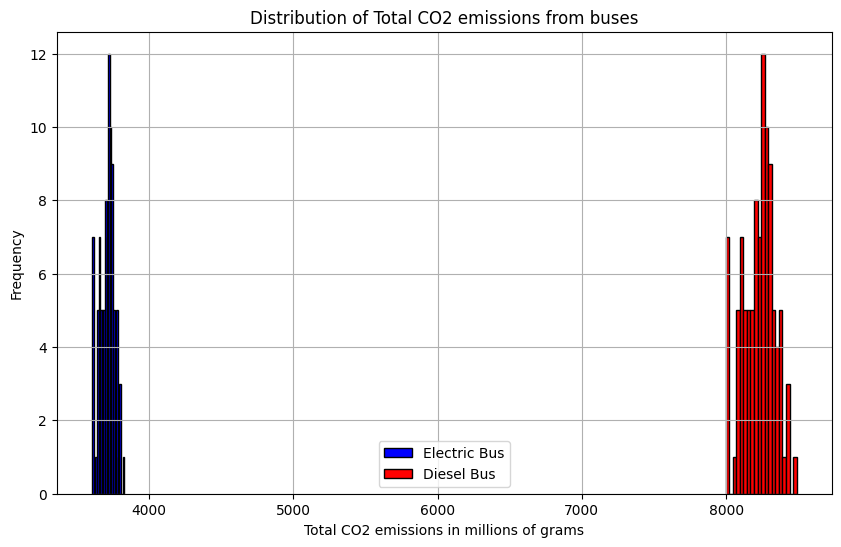

In [115]:
plt.figure(figsize=(10, 6))
plt.hist(simulation_df['Total Electric Bus CO2 in millions'], bins=20, color='blue', edgecolor='black', label='Electric Bus')
plt.hist(simulation_df['Total Diesel Bus CO2 in millions'], bins=20, color='red', edgecolor='black', label='Diesel Bus')
plt.xlabel('Total CO2 emissions in millions of grams')
plt.ylabel('Frequency')
plt.title('Distribution of Total CO2 emissions from buses')
plt.legend()
plt.grid(True)
plt.show()

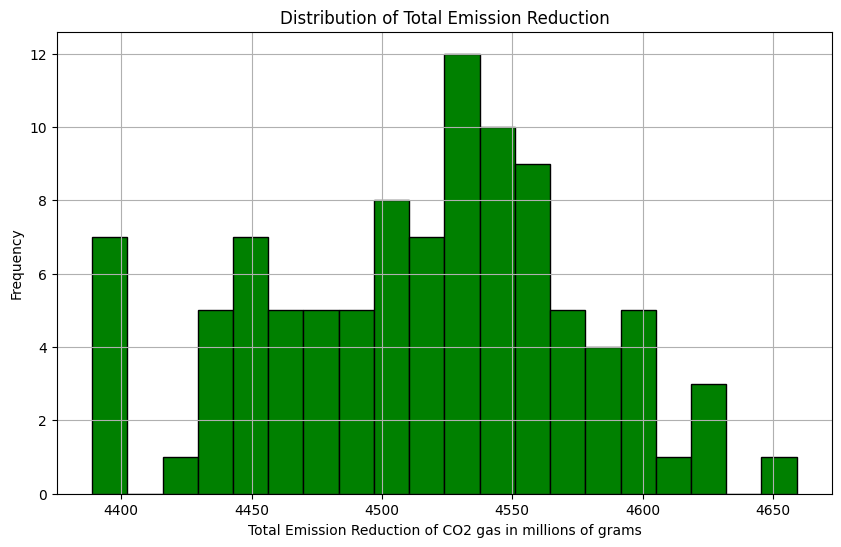

In [126]:
plt.figure(figsize=(10, 6))
plt.hist(simulation_df['Total Emission Reduction in millions'], bins=20, color='green', edgecolor='black')
plt.xlabel('Total Emission Reduction of CO2 gas in millions of grams')
plt.ylabel('Frequency')
plt.title('Distribution of Total Emission Reduction')
plt.grid(True)
plt.show()

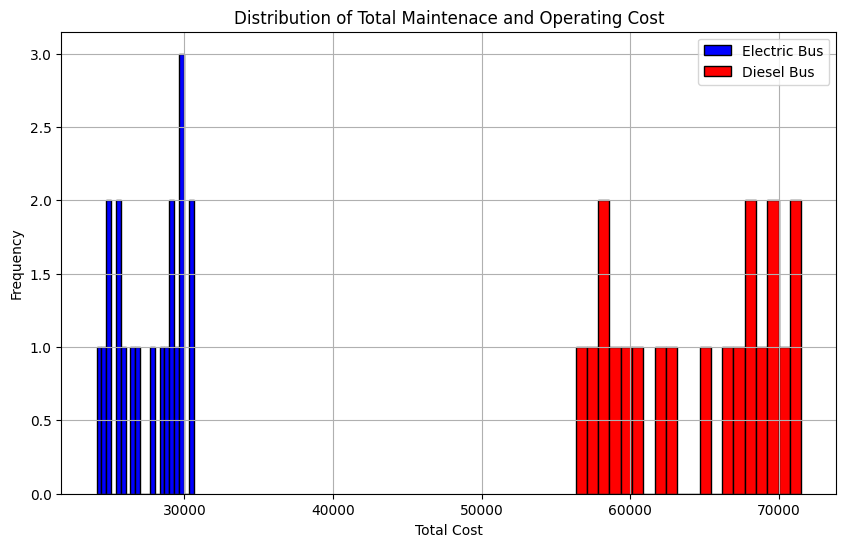

In [124]:
plt.figure(figsize=(10, 6))
plt.hist(year_df['Electric_Maintenance and Operation Cost'], bins=20, color='blue', edgecolor='black', label='Electric Bus')
plt.hist(year_df['Diesel Bus Maintenance and Operation Cost'], bins=20, color='red', edgecolor='black', label='Diesel Bus')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Total Maintenace and Operating Cost')
plt.legend()
plt.grid(True)
plt.show()

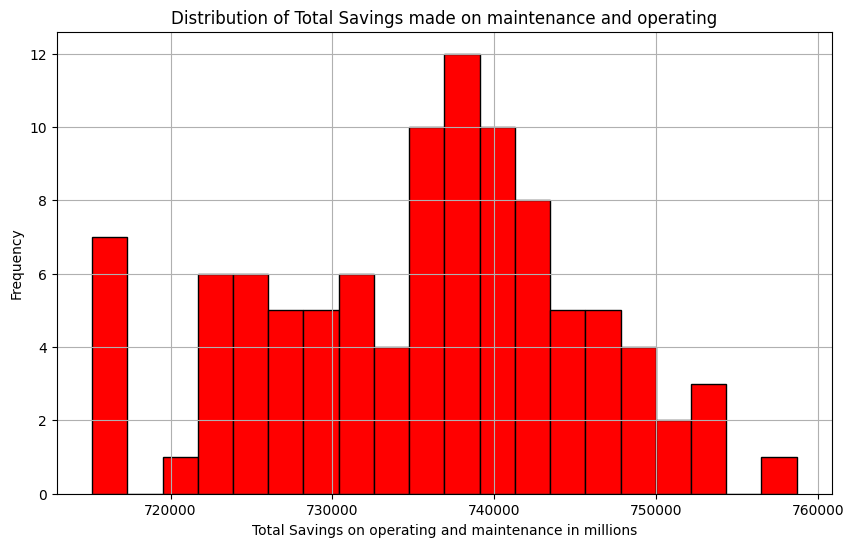

In [125]:
plt.figure(figsize=(10, 6))
plt.hist(simulation_df['Total Savings'], bins=20, color='red', edgecolor='black')
plt.xlabel('Total Savings on operating and maintenance in millions')
plt.ylabel('Frequency')
plt.title('Distribution of Total Savings made on maintenance and operating')
plt.grid(True)
plt.show()